In [68]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [69]:

boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [70]:
boston.data.shape

(506, 13)

In [71]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['Target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [72]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'Target']

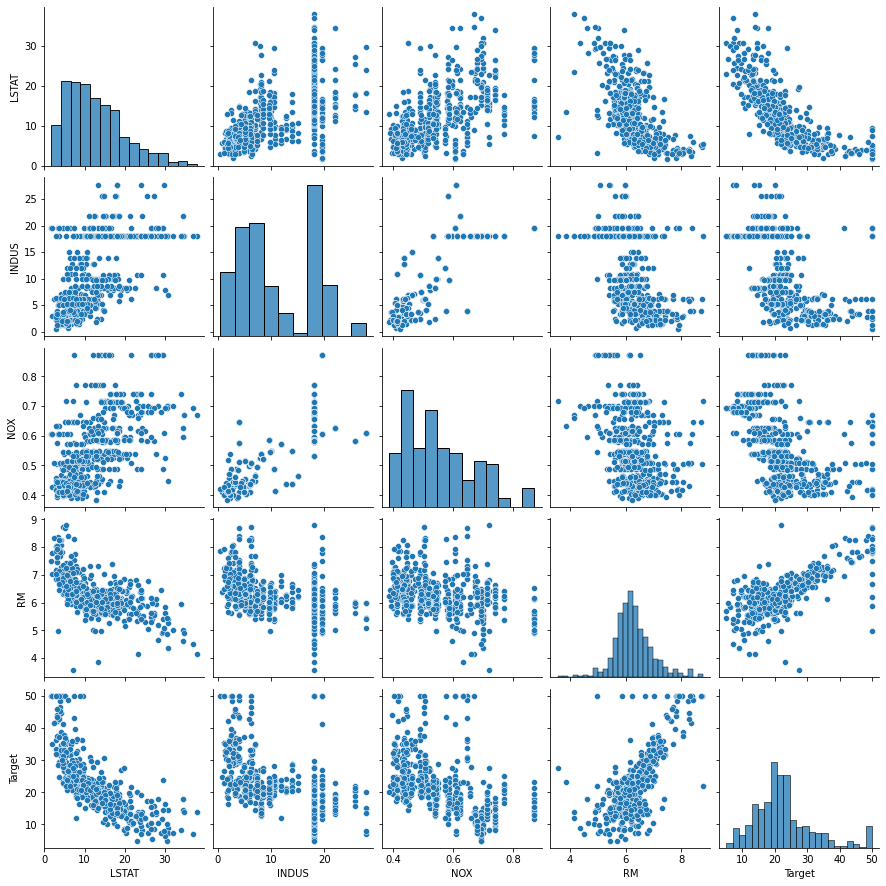

In [74]:

sns.pairplot(df_boston[cols])

In [75]:
cols

['LSTAT', 'INDUS', 'NOX', 'RM', 'Target']

In [76]:
df_boston[cols]

,LSTAT,INDUS,NOX,RM,Target
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2
...,...,...,...,...,...
501,9.67,11.93,0.573,6.593,22.4
502,9.08,11.93,0.573,6.120,20.6
503,5.64,11.93,0.573,6.976,23.9
504,6.48,11.93,0.573,6.794,22.0


In [77]:
df_boston[cols].values

array([[ 4.98 ,  2.31 ,  0.538,  6.575, 24.   ],
       [ 9.14 ,  7.07 ,  0.469,  6.421, 21.6  ],
       [ 4.03 ,  7.07 ,  0.469,  7.185, 34.7  ],
       ...,
       [ 5.64 , 11.93 ,  0.573,  6.976, 23.9  ],
       [ 6.48 , 11.93 ,  0.573,  6.794, 22.   ],
       [ 7.88 , 11.93 ,  0.573,  6.03 , 11.9  ]])

In [78]:
df_boston[cols].values.T

array([[ 4.98 ,  9.14 ,  4.03 , ...,  5.64 ,  6.48 ,  7.88 ],
       [ 2.31 ,  7.07 ,  7.07 , ..., 11.93 , 11.93 , 11.93 ],
       [ 0.538,  0.469,  0.469, ...,  0.573,  0.573,  0.573],
       [ 6.575,  6.421,  7.185, ...,  6.976,  6.794,  6.03 ],
       [24.   , 21.6  , 34.7  , ..., 23.9  , 22.   , 11.9  ]])

In [ ]:
cm = np.corrcoef(df_boston[cols].values.T)

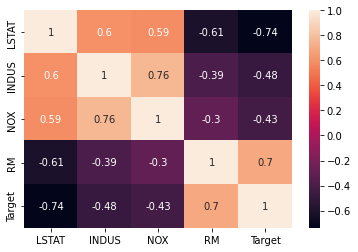

In [ ]:
hm = sns.heatmap(cm, cbar=True, annot=True, xticklabels=cols, yticklabels=cols)

### Simple Linear Regression

In [79]:
X = df_boston[['RM']].values

In [80]:
y = df_boston['Target'].values

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [83]:
slr = LinearRegression()

In [84]:
slr.fit(X_train, y_train)

LinearRegression()

In [88]:
print('slope: ', slr.coef_[0])

slope:  8.46109163711589


In [89]:
print('intercept:', slr.intercept_) # 절편

intercept: -30.571032410898322


In [90]:
def lin_reg_plot(X, y, model):
    plt.scatter(X, y, c='blue', edgecolors='white')
    plt.plot(X, model.predict(X), color='black')

Text(0.5, 1.0, 'Training set')

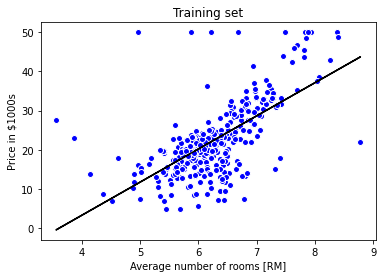

In [91]:
lin_reg_plot(X_train, y_train, slr)
plt.xlabel('Average number of rooms [RM]') 
plt.ylabel('Price in $1000s')
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

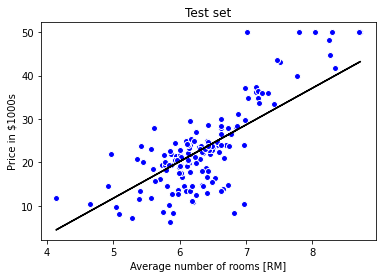

In [92]:
lin_reg_plot(X_test, y_test, slr)
plt.xlabel('Average number of rooms [RM]') 
plt.ylabel('Price in $1000s')
plt.title('Test set')

### Multiple Linear Regression

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
X = df_boston.iloc[:,0:-1].values

In [96]:
X.shape

(506, 13)

In [97]:
y = df_boston['Target'].values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [100]:
scaler.fit(X_train)

StandardScaler()

In [101]:
X_train_scaled = scaler.transform(X_train)

In [102]:
X_test_scaled = scaler.transform(X_test)

In [103]:
mlr = LinearRegression()

In [104]:
mlr.fit(X_train_scaled, y_train)

LinearRegression()

In [105]:
y_pred = mlr.predict(X_test_scaled)

In [106]:
# residual plots
def residual_plot(y_pred, y):
    plt.scatter(y_pred, y_pred-y, c="blue", marker='s', label="Residual plot")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.hlines(y=0, color="black", xmin=-10, xmax=50)

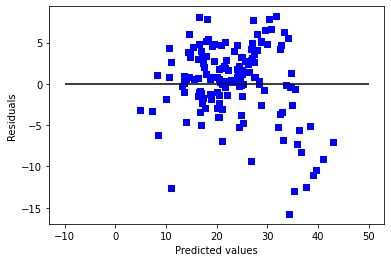

In [107]:
residual_plot(y_pred, y_test)

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
mean_squared_error(y_test, y_pred)

19.831323672063125

### Regularized Linear Regression

In [110]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [111]:
ridge = Ridge(alpha=1.0)


In [112]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [113]:
y_pred_ridge = ridge.predict(X_test_scaled)

In [114]:
mean_squared_error(y_test, y_pred_ridge)

19.809879496117013

In [115]:
lasso = Lasso(alpha=1.0)

In [116]:
lasso.fit(X_train_scaled, y_train)

Lasso()

In [117]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [118]:
mean_squared_error(y_test, y_pred_lasso)

29.89024282935218

In [119]:
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [120]:
elanet.fit(X_train_scaled, y_train)

ElasticNet()

In [121]:
y_pred_elanet = elanet.predict(X_test_scaled)

In [122]:
mean_squared_error(y_test, y_pred_elanet)

31.67152823129686

### Polynomial Regression

In [123]:
from sklearn.preprocessing import PolynomialFeatures

In [124]:
X = df_boston[['LSTAT']].values
y = df_boston['Target'].values

In [125]:
quadratic = PolynomialFeatures(degree=2)

In [126]:
cubic = PolynomialFeatures(degree=3)

In [127]:
X_quad = quadratic.fit_transform(X)

In [128]:
X_cubic = cubic.fit_transform(X)

In [129]:
X_fit = np.arange(X.min(), X.max(), 1).reshape(-1,1)

In [130]:
lr = LinearRegression()

In [132]:
# Linear Regression
lr = lr.fit(X, y)
y_lin_fit = lr.predict(X_fit)

In [133]:
# Linear Regression with degree=2
lr = lr.fit(X_quad, y)
y_quad_fit = lr.predict(quadratic.fit_transform(X_fit))

In [134]:
# Linear Regression with degress=3
lr = lr.fit(X_cubic, y)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))

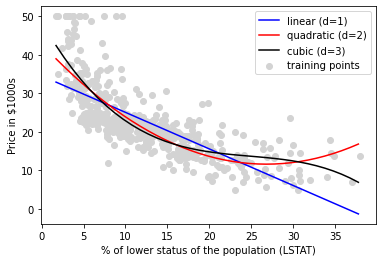

In [135]:
plt.scatter(X, y, label="training points", color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1)', color='blue', linestyle='-')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2)', color='red', linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3)', color='black', linestyle='-')
plt.xlabel('% of lower status of the population (LSTAT)')
plt.ylabel('Price in $1000s')
plt.legend(loc='upper right')